In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [5]:
df = pd.read_csv("../backend/data/business_data.csv")
df.head()

,date,region,product_category,price,discount_rate,marketing_spend,marketing_lag1,marketing_lag2,stock_available,out_of_stock,units_sold,revenue,cost,profit,is_holiday
0,2022-01-01,East,Clothing,48.148671,0.037027,1743,1743,1743,469,0,469,22581.726564,15939.774673,6641.951891,1
1,2022-01-02,West,Home,106.994377,0.108380,662,662,662,288,0,288,30814.380652,21973.478769,8840.901883,1
2,2022-01-03,North,Electronics,247.623250,0.174589,2474,662,1743,218,0,218,53981.868467,42289.973908,11691.894559,1
3,2022-01-04,East,Electronics,256.066507,0.146445,3791,2474,662,446,0,446,114205.662040,92507.123930,21698.538110,1
4,2022-01-05,East,Electronics,251.606331,0.161312,769,3791,2474,392,0,392,98629.681802,72615.666251,26014.015552,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              1000 non-null   object 
 1   region            1000 non-null   object 
 2   product_category  1000 non-null   object 
 3   price             1000 non-null   float64
 4   discount_rate     1000 non-null   float64
 5   marketing_spend   1000 non-null   int64  
 6   marketing_lag1    1000 non-null   int64  
 7   marketing_lag2    1000 non-null   int64  
 8   stock_available   1000 non-null   int64  
 9   out_of_stock      1000 non-null   int64  
 10  units_sold        1000 non-null   int64  
 11  revenue           1000 non-null   float64
 12  cost              1000 non-null   float64
 13  profit            1000 non-null   float64
 14  is_holiday        1000 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 117.3+ KB


In [7]:
df.describe()

,price,discount_rate,marketing_spend,marketing_lag1,marketing_lag2,stock_available,out_of_stock,units_sold,revenue,cost,profit,is_holiday
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,115.601182,0.101403,2782.67600,2779.729000,2776.913000,278.063000,0.04200,278.063000,31674.591198,22861.286134,8813.305065,0.248000
std,98.873100,0.058438,1257.35133,1258.865341,1258.030571,131.263724,0.20069,131.263724,33578.722167,24441.320722,9959.744182,0.432068
min,16.014664,0.000644,506.00000,506.000000,506.000000,50.000000,0.00000,50.000000,836.040554,543.156767,174.492002,0.000000
25%,41.575072,0.048215,1704.25000,1696.000000,1696.000000,163.000000,0.00000,163.000000,7890.625597,5597.553892,2135.973851,0.000000
50%,99.224977,0.103747,2787.50000,2783.500000,2779.500000,273.500000,0.00000,273.500000,18314.253229,13178.010084,4788.163012,0.000000
75%,242.730384,0.152093,3914.25000,3914.250000,3905.750000,392.000000,0.00000,392.000000,42889.975433,31123.869245,11716.381081,0.000000
max,299.806904,0.199883,4999.00000,4999.000000,4999.000000,499.000000,1.00000,499.000000,147668.958450,120096.512213,50220.072061,1.000000


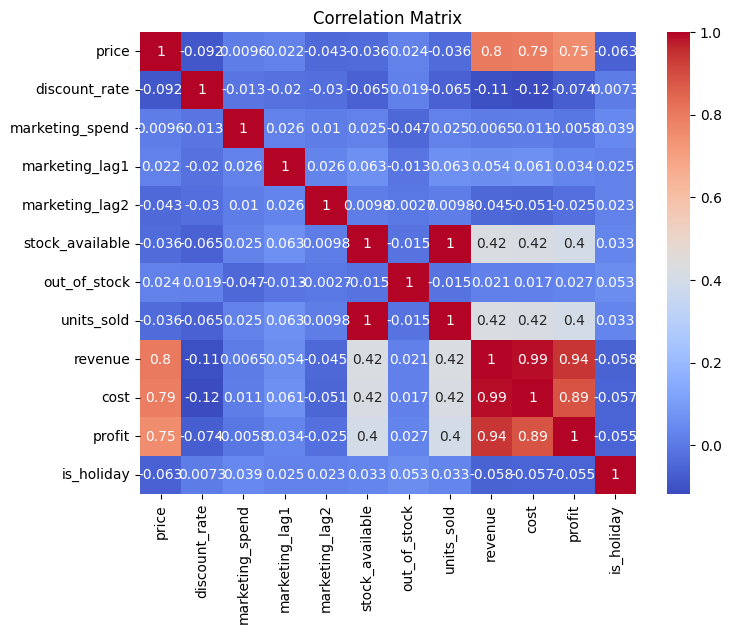

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [9]:
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.month
df["day_of_week"] = df["date"].dt.dayofweek

In [10]:
X = df.drop(columns=["profit", "date"])
y = df["profit"]

In [11]:
categorical_features = ["region", "product_category"]
numeric_features = [col for col in X.columns if col not in categorical_features]

In [12]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", "passthrough", numeric_features)
    ]
)

In [13]:
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    max_depth=12
)


In [14]:
pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", model)
])


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
pipeline.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [18]:
y_pred = pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")


R²: 0.948
RMSE: 2267.12


In [20]:
import joblib
joblib.dump(pipeline, "../backend/ml/model.pkl")
print("✅ Modèle sauvegardé")


✅ Modèle sauvegardé
